In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
background_img = cv2.imread("dubai.png")
background_img = cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB)
img = cv2.imread("cassiope.png")
img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


## creating hsv mask

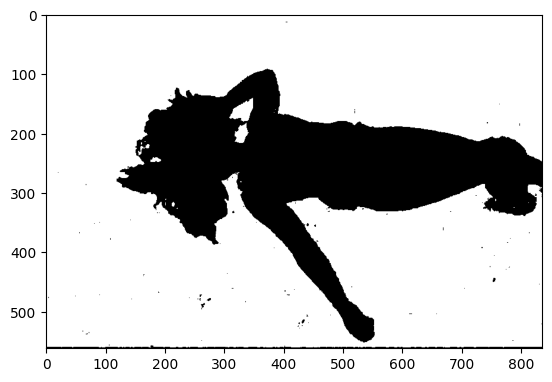

In [29]:
hsv_img  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_bound = np.array([17, 17, 17])
upper_bound = np.array([80, 255, 255])
mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
plt.imshow(mask, cmap="gray")
plt.show()

## deleting background from image using the mask

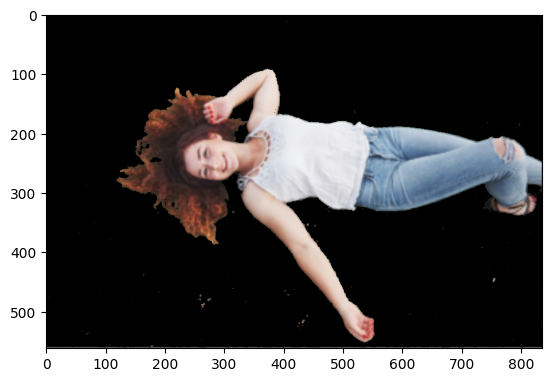

In [28]:
object_without_background = cv2.bitwise_and(img_rbg, img_rbg, mask=~mask)

plt.imshow(object_without_background, cmap='gray')
plt.show()

On aurait pu nettoyer le mask en appliquant une operation de morphologie comme l'ouverture par exemple

## resize image background

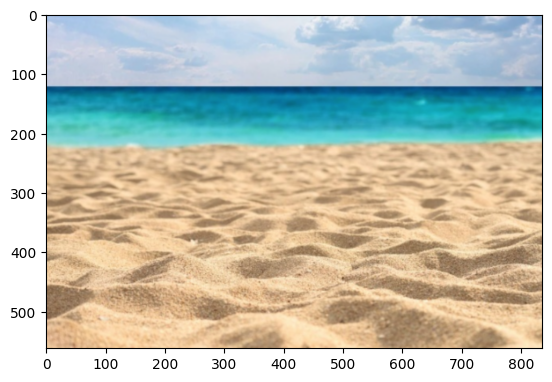

In [27]:

background_resized = cv2.resize(background_img, (img.shape[1], img.shape[0]))


plt.imshow(background_resized, cmap="gray")
plt.show()

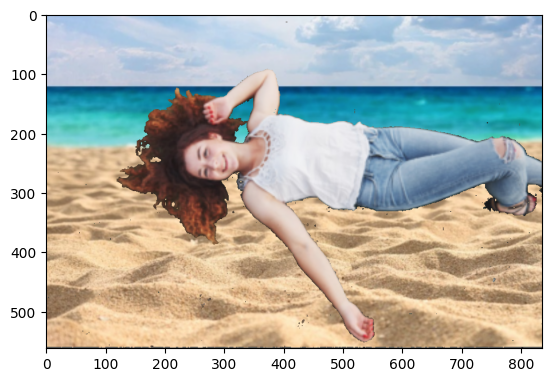

In [40]:
background_with_hole = cv2.bitwise_and(background_resized, background_resized, mask=mask)
result_image = background_with_hole + object_without_background #cv2.add (background_with_hole, object_without_background)
plt.imshow(result_image, cmap="gray")
plt.show()


## applying opening morphology to our mask

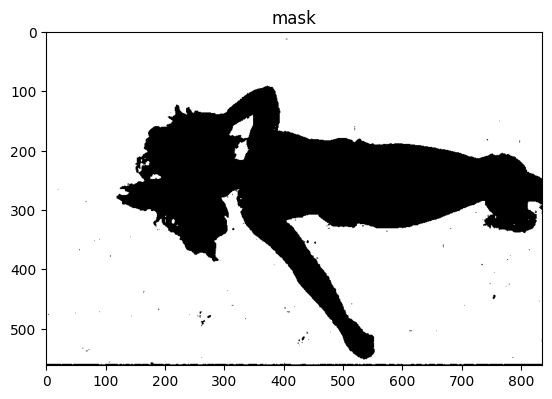

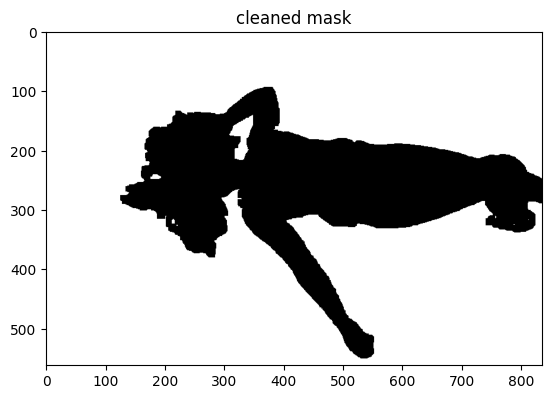

In [38]:
plt.imshow(mask, cmap="gray")
plt.title("mask")
plt.show()
kernel = np.ones((9, 9),np.uint8)
opened_mask = ~cv2.morphologyEx(~mask, cv2.MORPH_OPEN, kernel)


plt.imshow(opened_mask, cmap="gray")
plt.title("cleaned mask")
plt.show()